**CÓDIGO COMPLETO E INSTRUCCIONES para librería de kolmogorov

[Github click aquí](https://github.com/algorithmic-dynamics-lab/pybdm)

In [0]:
pip install git+https://github.com/sztal/pybdm.git

  Cloning https://github.com/sztal/pybdm.git to /tmp/pip-req-build-g34tzv41
  Running command git clone -q https://github.com/sztal/pybdm.git /tmp/pip-req-build-g34tzv41
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ioqp84e/wheels/36/1a/04/b95e70e76388ff41060264a1438eb98b7742c1393fce2b66c4
Successfully built bdm


In [0]:
import keras
import numpy as np
from bdm import BDM
import random
from keras.preprocessing.sequence import pad_sequences

# Initialize BDM object
# ndim argument specifies dimensionality of BDM
bdm = BDM(ndim=1)

Using TensorFlow backend.


In [0]:
#Cargamos el modelo y los pesos
#solo para anaconda
import keras
from keras.models import load_model
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
# Recreate the exact same model, including weights and optimizer.
NN_100=keras.models.load_model("model_30000 seqs_size_21a100_epochs_3000.h5")

Saving model_30000 seqs_size_21a100_epochs_3000.h5 to model_30000 seqs_size_21a100_epochs_3000.h5


W0729 23:10:40.811082 140237028501376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 23:10:40.852191 140237028501376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 23:10:40.899987 140237028501376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0729 23:10:40.900961 140237028501376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0729 23:10:40.901896 140237028501376 depre

User uploaded file "model_30000 seqs_size_21a100_epochs_3000.h5" with length 229640 bytes


W0729 23:10:43.779620 140237028501376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
# Recreate the exact same model, including weights and optimizer.
NN_1000=keras.models.load_model("model_30000 seqs_size_101a1001_epochs_4000.h5")

Saving model_30000 seqs_size_101a1001_epochs_4000.h5 to model_30000 seqs_size_101a1001_epochs_4000.h5
User uploaded file "model_30000 seqs_size_101a1001_epochs_4000.h5" with length 20092372 bytes


In [0]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
# Recreate the exact same model, including weights and optimizer.
NN_20=keras.models.load_model("model_30000 seqs_size_12a20_epochs_2500.h5")

Saving model_30000 seqs_size_12a20_epochs_2500.h5 to model_30000 seqs_size_12a20_epochs_2500.h5
User uploaded file "model_30000 seqs_size_12a20_epochs_2500.h5" with length 36048 bytes


In [0]:
#Función para usar el modelo entrenado con secuencias de mayor longitud a las entrenadas
#OPCIÓN 2 Cambiamos ciclo for por map
#MUCHO MÁS RAPIDO!!!!
import keras
from keras.preprocessing.sequence import pad_sequences
import math
import collections
import numpy as np
tamaño_max=1001
tamaño_max_2=100
tamaño_max_3=20

def kolmo(seq ,counter=1,complexity=0):
  #print(seq)
  #if len(seq[0])<=tamaño_max:
  if (len(seq[0])<tamaño_max): #tamaño máximo con el que entrenamos es 12
    if (len(seq[0])>tamaño_max_2):
      #print(seq)
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max)
      #print(sequence)
      complexity=NN_1000.predict(sequence) + math.log(counter,2)
      #return complexity
    elif (len(seq[0])<=tamaño_max_2 and len(seq[0])>tamaño_max_3):
      #print(seq)
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max_2)
      #print(sequence)
      complexity=NN_100.predict(sequence)+ math.log(counter,2)
      #return complexity
    elif (len(seq[0])<=tamaño_max_3 and len(seq[0])>11):
      #print(seq)
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max_3)
      #print(sequence)
      complexity=NN_20.predict(sequence)[0] + math.log(counter,2)
      #return complexity
    else:
      complexity=2.285794 #complejidad de seqs 0 y 1
      #return complexity
    ######################## lineas opcionales para evitar gran error en l=1000
  #elif (len(seq[0])==tamaño_max):
    #splitted=np.array_split(seq[0],math.ceil(len(seq[0])/tamaño_max_2))
    #print(splitted)
    #splitted_tuple=map(tuple,splitted)
    #counts=collections.Counter(splitted_tuple)#contamos el número de veces que se repite cada secuencia
    #complexity_list=list(map(kolmo,[splitted],counts.values()))
    #print(complexity_list)
    #complexity=sum(complexity_list[0])
    #complexity=NN_1000.predict(seq)
    #return complexity[0]
    ####################### lineas opcionales para evitar gran error en l=1000
  elif (len(seq[0])>=tamaño_max):
    splitted=np.array_split(seq[0],math.ceil(len(seq[0])/(tamaño_max -1)))
    splitted_tuple=map(tuple,splitted)
    counts=collections.Counter(splitted_tuple)#contamos el número de veces que se repite cada secuencia
    
    #print(list(map(tuple,[splitted])))
    #tuple_names=list(map(tuple,[splitted]))
    #reps=counts[map(tuple,splitted)]
    #print(counts.values())
    #print(splitted)
    complexity_list=list(map(kolmo,[splitted],counts.values()))
    #print(type(complexity_list))
    #print(complexity_list[0])
    complexity=sum(complexity_list[0])
    #return complexity[0]
  else:
    complexity=2.285794 #complejidad de seqs 0 y 1
    #return complexity
  return complexity

In [0]:
#para imprimir pantalla



def kolmo(seq ,counter=1,complexity=0):
  if (len(seq[0])<tamaño_max): 
    if (len(seq[0])>tamaño_max_2):
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max)
      complexity=NN_1000.predict(sequence) + math.log(counter,2) ##NN 101<=long<=1001
    elif (len(seq[0])<=tamaño_max_2 and len(seq[0])>tamaño_max_3):
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max_2)
      complexity=NN_100.predict(sequence)+ math.log(counter,2) ##NN 21<=long<=100
    elif (len(seq[0])<=tamaño_max_3 and len(seq[0])>11):
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max_3)
      complexity=NN_20.predict(sequence)[0] + math.log(counter,2) ##NN 12<>long<=20

In [0]:
#comprobamos que funciona el modelo con secuencias de tamaño mayor al entrenado
tamaño=random.randint(12,1000) #elegimos tamaño de la secuencia en turno al azar entre 12 y tamaño max
prueba=np.random.choice(2, tamaño).reshape(1,tamaño)
#print(prueba)
print("tamaño=",tamaño)
print(kolmo(prueba))
print(bdm.bdm(prueba[0]))
#print(prueba[0])
#splitted=np.array_split(prueba[0],math.ceil(len(prueba[0])/3))
#print(splitted)
#print(splitted[0].reshape(1,tamaño))
#print(len(splitted[1]))
#print(splitted[1])
#pad_sequences([splitted[1]],value=-1, maxlen=15)

tamaño= 119
[[326.60074]]
296.40467939073113


In [0]:
#experimento para comprobar como funciona el modelo
tamaño=random.randint(12,tamaño_max_3) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

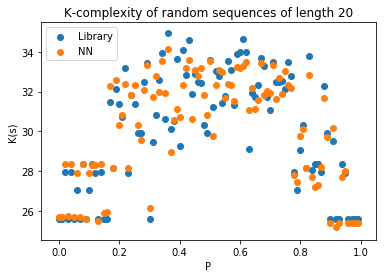

In [0]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [0]:
#experimento para comprobar como funciona el modelo con secuencias mayores a las entrenadas
tamaño=random.randint(tamaño_max_3 +1,tamaño_max_2) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

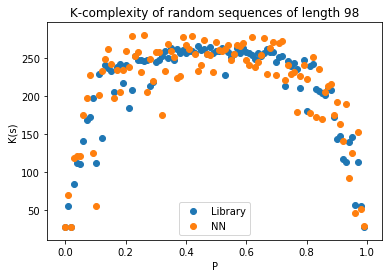

In [0]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [0]:
#experimento para comprobar como funciona el modelo con secuencias mayores a las entrenadas
tamaño=random.randint(tamaño_max_2 +1,tamaño_max-1) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

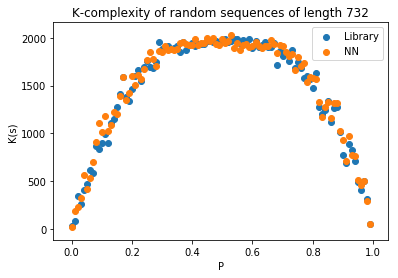

In [0]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [0]:
#experimento para comprobar como funciona el modelo con secuencias mayores a las entrenadas
tamaño=random.randint(tamaño_max,4*tamaño_max) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

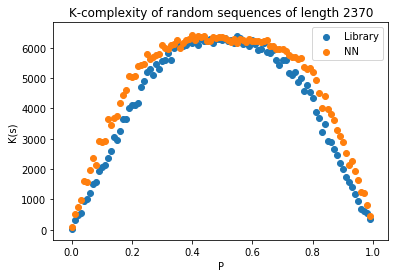

In [0]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="Library")
plt.scatter(P,Kolmo_neuro,label="NN")
plt.xlabel('P')
plt.ylabel('K(s)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('general_Kolmo_neuro'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo_neuro)
csvFile.close()

with open('general_Kolmo'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(Kolmo)
csvFile.close()

with open('general_P'+str(tamaño)+'.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(P)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('general_Kolmo_neuro'+str(tamaño)+'.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('general_Kolmo'+str(tamaño)+'.csv')
files.download('general_P'+str(tamaño)+'.csv')

In [0]:
#experimento error y tiempo
import time

long_max=20000 #con 10 000 tarda aprox. 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, i).reshape(1,i)
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start #Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of consecutive calls is valid.
  start = time.process_time()
  lib[i-12]=bdm.bdm(prueba[0])
  time_lib[i-12]=time.process_time() - start
  longs[i-12]=i

(0, 60)

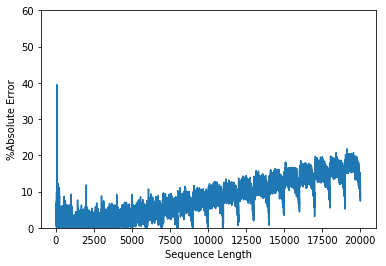

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,60)

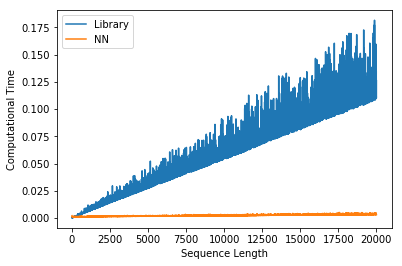

In [0]:
plt.plot(longs,time_lib,label="Library")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time') #computational
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('lib.csv')
files.download('longs.csv')
files.download('time_lib.csv')
files.download('time_mi_lib.csv')

In [0]:
#experimento error y tiempo
import time

long_max=10000 #con 10 000 tarda aprox. 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, i).reshape(1,i)
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start #Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of consecutive calls is valid.
  start = time.process_time()
  lib[i-12]=bdm.bdm(prueba[0])
  time_lib[i-12]=time.process_time() - start
  longs[i-12]=i

  

(0, 60)

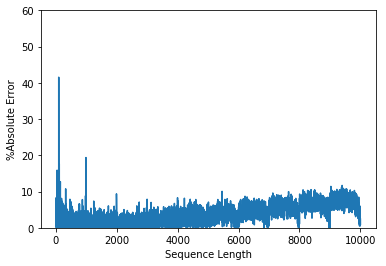

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,60)

In [0]:
time.get_clock_info('process_time') #verificamos resolución

namespace(adjustable=False, implementation='clock_gettime(CLOCK_PROCESS_CPUTIME_ID)', monotonic=True, resolution=1e-09)

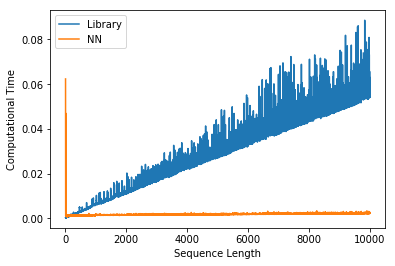

In [0]:
plt.plot(longs,time_lib,label="Library")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time') #computational
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('lib.csv')
files.download('longs.csv')
files.download('time_lib.csv')
files.download('time_mi_lib.csv')

In [0]:
#ahora contra la librería en paralelo de BDM
#experimento error y tiempo
#sin tomar en cuenta el tiempo para segmentar la secuencia
import time
import numpy as np
from joblib import Parallel, delayed
from bdm import BDM
from bdm.utils import slice_dataset

bdm = BDM(ndim=1)

kernels=4
long_max=5000 #con 10 000 tardó aprox una hora
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, kernels*i).reshape(1,kernels*i) #usamos secuencias de tamaño múltiplo del num de kernels
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start
  
  if len(prueba[0])>=48:
    counters_demo = Parallel(n_jobs=4) \
    (delayed(bdm.count_and_lookup)(d) for d in slice_dataset(prueba[0], (round(len(prueba[0])/kernels),))) #tam min de secuencias es 12
    start = time.process_time()
    lib[i-12]=bdm.compute_bdm(*counters_demo)
    time_lib[i-12]=time.process_time() - start
  else:
    start = time.process_time()
    lib[i-12]=bdm.bdm(prueba[0])
    time_lib[i-12]=time.process_time() - start
  longs[i-12]=kernels*i

(0, 100)

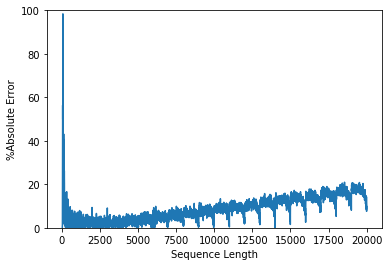

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,100)

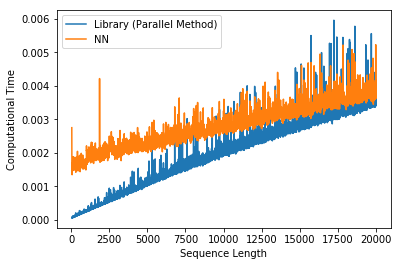

In [0]:
plt.plot(longs,time_lib,label="Library (Parallel Method)")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('para_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('para_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('para_longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('para_time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('para_time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('para_mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('para_lib.csv')
files.download('para_longs.csv')
files.download('para_time_lib.csv')
files.download('para_time_mi_lib.csv')

In [0]:
#ahora contra la librería en paralelo de BDM
#experimento error y tiempo
#tomando en cuenta el tiempo necesario para segmemtar la secuencia
import time
import numpy as np
from joblib import Parallel, delayed
from bdm import BDM
from bdm.utils import slice_dataset

bdm = BDM(ndim=1)

kernels=4
long_max=5000 #con 3000 tardó aprox 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, kernels*i).reshape(1,kernels*i) #usamos secuencias de tamaño múltiplo del num de kernels
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start
  
  if len(prueba[0])>=48:
    start = time.process_time()
    counters_demo = Parallel(n_jobs=4) \
    (delayed(bdm.count_and_lookup)(d) for d in slice_dataset(prueba[0], (round(len(prueba[0])/kernels),))) #tam min de secuencias es 12
    lib[i-12]=bdm.compute_bdm(*counters_demo)
    time_lib[i-12]=time.process_time() - start
  else:
    start = time.process_time()
    lib[i-12]=bdm.bdm(prueba[0])
    time_lib[i-12]=time.process_time() - start
  longs[i-12]=kernels*i

(0, 100)

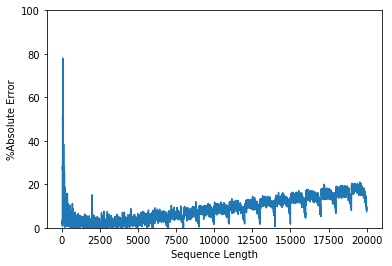

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,100)

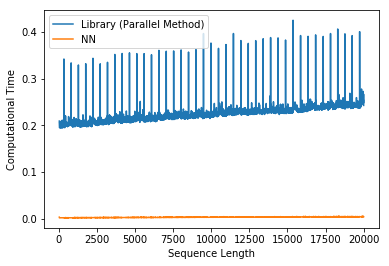

In [0]:
plt.plot(longs,time_lib,label="Library (Parallel Method)")
plt.plot(longs,time_mi_lib,label="NN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()

In [0]:
#guardamos los datos
import csv

with open('para2_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(mi_lib)
csvFile.close()

with open('para2_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(lib)
csvFile.close()

with open('para2_longs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(longs)
csvFile.close()

with open('para2_time_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_lib)
csvFile.close()

with open('para2_time_mi_lib.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(time_mi_lib)
csvFile.close()

#Lineas exclusivas para trabajar en Collab (no necesarias en anaconda)
from google.colab import files
files.download('para2_mi_lib.csv') # si queremos descargar el archivo a la carpeta de descargas
files.download('para2_lib.csv')
files.download('para2_longs.csv')
files.download('para2_time_lib.csv')
files.download('para2_time_mi_lib.csv')

**AHORA LOS MISMO, PERO PROBAMOS CON UN SPLIT DE TAMAÑO IGUAL A 500 EN LUGAR DE 1000 PARA LOS BLOQUES**

In [0]:
#Función para usar el modelo entrenado con secuencias de mayor longitud a las entrenadas
#OPCIÓN 2 Cambiamos ciclo for por map
#MUCHO MÁS RAPIDO!!!!
import keras
from keras.preprocessing.sequence import pad_sequences
import math
import collections
import numpy as np
tamaño_max=1001
tamaño_max_2=100
tamaño_max_3=20

def kolmo(seq ,counter=1,complexity=0):
  #print(seq)
  #if len(seq[0])<=tamaño_max:
  if (len(seq[0])<tamaño_max): #tamaño máximo con el que entrenamos es 12
    if (len(seq[0])>tamaño_max_2):
      #print(seq)
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max)
      #print(sequence)
      complexity=NN_1000.predict(sequence) + math.log(counter,2)
      #return complexity
    elif (len(seq[0])<=tamaño_max_2 and len(seq[0])>tamaño_max_3):
      #print(seq)
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max_2)
      #print(sequence)
      complexity=NN_100.predict(sequence)+ math.log(counter,2)
      #return complexity
    elif (len(seq[0])<=tamaño_max_3 and len(seq[0])>11):
      #print(seq)
      sequence=pad_sequences(seq,value=-1, maxlen=tamaño_max_3)
      #print(sequence)
      complexity=NN_20.predict(sequence)[0] + math.log(counter,2)
      #return complexity
    else:
      complexity=2.285794 #complejidad de seqs 0 y 1
      #return complexity
    ######################## lineas opcionales para evitar gran error en l=1000
  #elif (len(seq[0])==tamaño_max):
    #splitted=np.array_split(seq[0],math.ceil(len(seq[0])/tamaño_max_2))
    #print(splitted)
    #splitted_tuple=map(tuple,splitted)
    #counts=collections.Counter(splitted_tuple)#contamos el número de veces que se repite cada secuencia
    #complexity_list=list(map(kolmo,[splitted],counts.values()))
    #print(complexity_list)
    #complexity=sum(complexity_list[0])
    #complexity=NN_1000.predict(seq)
    #return complexity[0]
    ####################### lineas opcionales para evitar gran error en l=1000
  elif (len(seq[0])>=tamaño_max):
    splitted=np.array_split(seq[0],math.ceil(len(seq[0])/(500)))
    splitted_tuple=map(tuple,splitted)
    counts=collections.Counter(splitted_tuple)#contamos el número de veces que se repite cada secuencia
    
    #print(list(map(tuple,[splitted])))
    #tuple_names=list(map(tuple,[splitted]))
    #reps=counts[map(tuple,splitted)]
    #print(counts.values())
    #print(splitted)
    complexity_list=list(map(kolmo,[splitted],counts.values()))
    #print(type(complexity_list))
    #print(complexity_list[0])
    complexity=sum(complexity_list[0])
    #return complexity[0]
  else:
    complexity=2.285794 #complejidad de seqs 0 y 1
    #return complexity
  return complexity

In [0]:
#experimento para comprobar como funciona el modelo
tamaño=random.randint(10000,10000) #elegimos tamaño de las secuencias a usar en el experimento
#el experimento debe funcionar con cualquier tamaño entre 12 y tamaño max
num_exps=100
P=np.zeros((num_exps))
Kolmo=np.zeros((num_exps))
Kolmo_neuro=np.zeros((num_exps))
dprob=1/num_exps

prob=0
for i in range(num_exps):
  sequ=np.random.choice(2, tamaño,p=[1-prob,prob]).reshape(1,tamaño)
  P[i]=prob
  Kolmo_neuro[i]=kolmo(sequ)
  Kolmo[i]=bdm.bdm(sequ[0])
  prob+=dprob

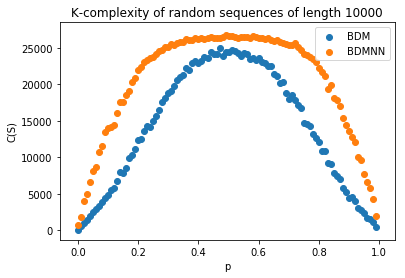

In [0]:
import matplotlib.pyplot as plt
plt.scatter(P,Kolmo,label="BDM")
plt.scatter(P,Kolmo_neuro,label="BDMNN")
plt.xlabel('p')
plt.ylabel('C(S)')
plt.title('K-complexity of random sequences of length '+str(tamaño))
plt.legend()
save=plt.savefig('file.png', dpi=400)
from google.colab import files
files.download('file.png') # si queremos descargar el archivo a la carpeta de descargas

In [0]:
#experimento error y tiempo
import time

long_max=10000 #con 10 000 tarda aprox. 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, i).reshape(1,i)
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start #Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of consecutive calls is valid.
  start = time.process_time()
  lib[i-12]=bdm.bdm(prueba[0])
  time_lib[i-12]=time.process_time() - start
  longs[i-12]=i

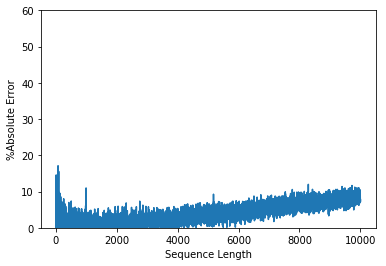

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,60)
save=plt.savefig('error.png', dpi=400)
from google.colab import files
files.download('error.png') # si queremos descargar el archivo a la carpeta de descargas

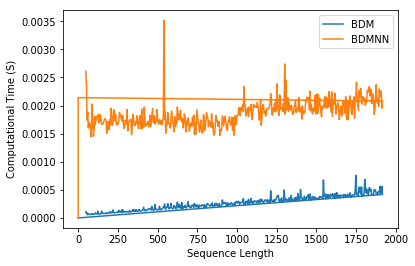

In [0]:
plt.plot(longs,time_lib,label="BDM")
plt.plot(longs,time_mi_lib,label="BDMNN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time (S)') #computational
plt.legend()
save=plt.savefig('time.png', dpi=400)
from google.colab import files
files.download('time.png') # si queremos descargar el archivo a la carpeta de descargas

In [0]:
#ahora contra la librería en paralelo de BDM
#experimento error y tiempo
#sin tomar en cuenta el tiempo para segmentar la secuencia
import time
import numpy as np
from joblib import Parallel, delayed
from bdm import BDM
from bdm.utils import slice_dataset

bdm = BDM(ndim=1)

kernels=4
long_max=5000 #con 10 000 tardó aprox una hora
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, kernels*i).reshape(1,kernels*i) #usamos secuencias de tamaño múltiplo del num de kernels
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start
  
  if len(prueba[0])>=48:
    counters_demo = Parallel(n_jobs=4) \
    (delayed(bdm.count_and_lookup)(d) for d in slice_dataset(prueba[0], (round(len(prueba[0])/kernels),))) #tam min de secuencias es 12
    start = time.process_time()
    lib[i-12]=bdm.compute_bdm(*counters_demo)
    time_lib[i-12]=time.process_time() - start
  else:
    start = time.process_time()
    lib[i-12]=bdm.bdm(prueba[0])
    time_lib[i-12]=time.process_time() - start
  longs[i-12]=kernels*i

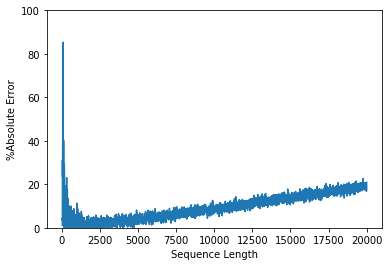

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,100)
save=plt.savefig('errorparallel.png', dpi=400)
from google.colab import files
files.download('errorparallel.png') # si queremos descargar el archivo a la carpeta de descargas

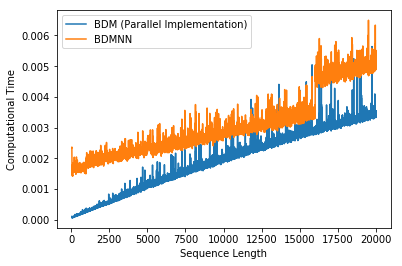

In [0]:
plt.plot(longs,time_lib,label="BDM (Parallel Implementation)")
plt.plot(longs,time_mi_lib,label="BDMNN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
save=plt.savefig('timeparallel.png', dpi=400)
from google.colab import files
files.download('timeparallel.png') # si queremos descargar el archivo a la carpeta de descargas

In [0]:
#ahora contra la librería en paralelo de BDM
#experimento error y tiempo
#tomando en cuenta el tiempo necesario para segmemtar la secuencia
import time
import numpy as np
from joblib import Parallel, delayed
from bdm import BDM
from bdm.utils import slice_dataset

bdm = BDM(ndim=1)

kernels=4
long_max=5000 #con 3000 tardó aprox 20 minutos
time_lib=np.zeros((long_max-11))
time_mi_lib=np.zeros((long_max-11))
lib=np.zeros((long_max-11))
mi_lib=np.zeros((long_max-11))
longs=np.zeros((long_max-11))

for i in range(12,long_max+1):
  prueba=np.random.choice(2, kernels*i).reshape(1,kernels*i) #usamos secuencias de tamaño múltiplo del num de kernels
  start = time.process_time()
  mi_lib[i-12]=kolmo(prueba)
  time_mi_lib[i-12]=time.process_time() - start
  
  if len(prueba[0])>=48:
    start = time.process_time()
    counters_demo = Parallel(n_jobs=4) \
    (delayed(bdm.count_and_lookup)(d) for d in slice_dataset(prueba[0], (round(len(prueba[0])/kernels),))) #tam min de secuencias es 12
    lib[i-12]=bdm.compute_bdm(*counters_demo)
    time_lib[i-12]=time.process_time() - start
  else:
    start = time.process_time()
    lib[i-12]=bdm.bdm(prueba[0])
    time_lib[i-12]=time.process_time() - start
  longs[i-12]=kernels*i

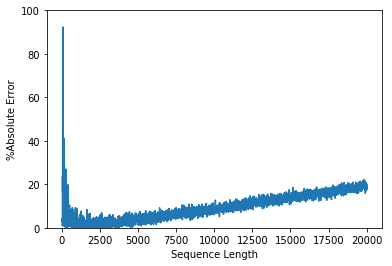

In [0]:
import matplotlib.pyplot as plt
plt.plot(longs,abs((lib-mi_lib)/lib)*100)
plt.xlabel('Sequence Length')
plt.ylabel('%Absolute Error')
plt.ylim(0,100)
save=plt.savefig('errorparallelmasseg.png', dpi=400)
from google.colab import files
files.download('errorparallelmasseg.png') # si queremos descargar el archivo a la carpeta de descargas

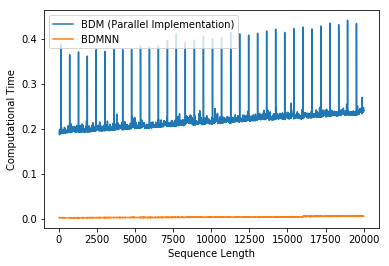

In [0]:
plt.plot(longs,time_lib,label="BDM (Parallel Implementation)")
plt.plot(longs,time_mi_lib,label="BDMNN")
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
save=plt.savefig('timeparallelmasseg.png', dpi=400)
from google.colab import files
files.download('timeparallelmasseg.png') # si queremos descargar el archivo a la carpeta de descargas